# Practice Assignment: Understanding Distributions Through Sampling

** *This assignment is optional, and I encourage you to share your solutions with me and your peers in the discussion forums!* **


To complete this assignment, create a code cell that:
* Creates a number of subplots using the `pyplot subplots` or `matplotlib gridspec` functionality.
* Creates an animation, pulling between 100 and 1000 samples from each of the random variables (`x1`, `x2`, `x3`, `x4`) for each plot and plotting this as we did in the lecture on animation.
* **Bonus:** Go above and beyond and "wow" your classmates (and me!) by looking into matplotlib widgets and adding a widget which allows for parameterization of the distributions behind the sampling animations.


Tips:
* Before you start, think about the different ways you can create this visualization to be as interesting and effective as possible.
* Take a look at the histograms below to get an idea of what the random variables look like, as well as their positioning with respect to one another. This is just a guide, so be creative in how you lay things out!
* Try to keep the length of your animation reasonable (roughly between 10 and 30 seconds).

<IPython.core.display.Javascript object>


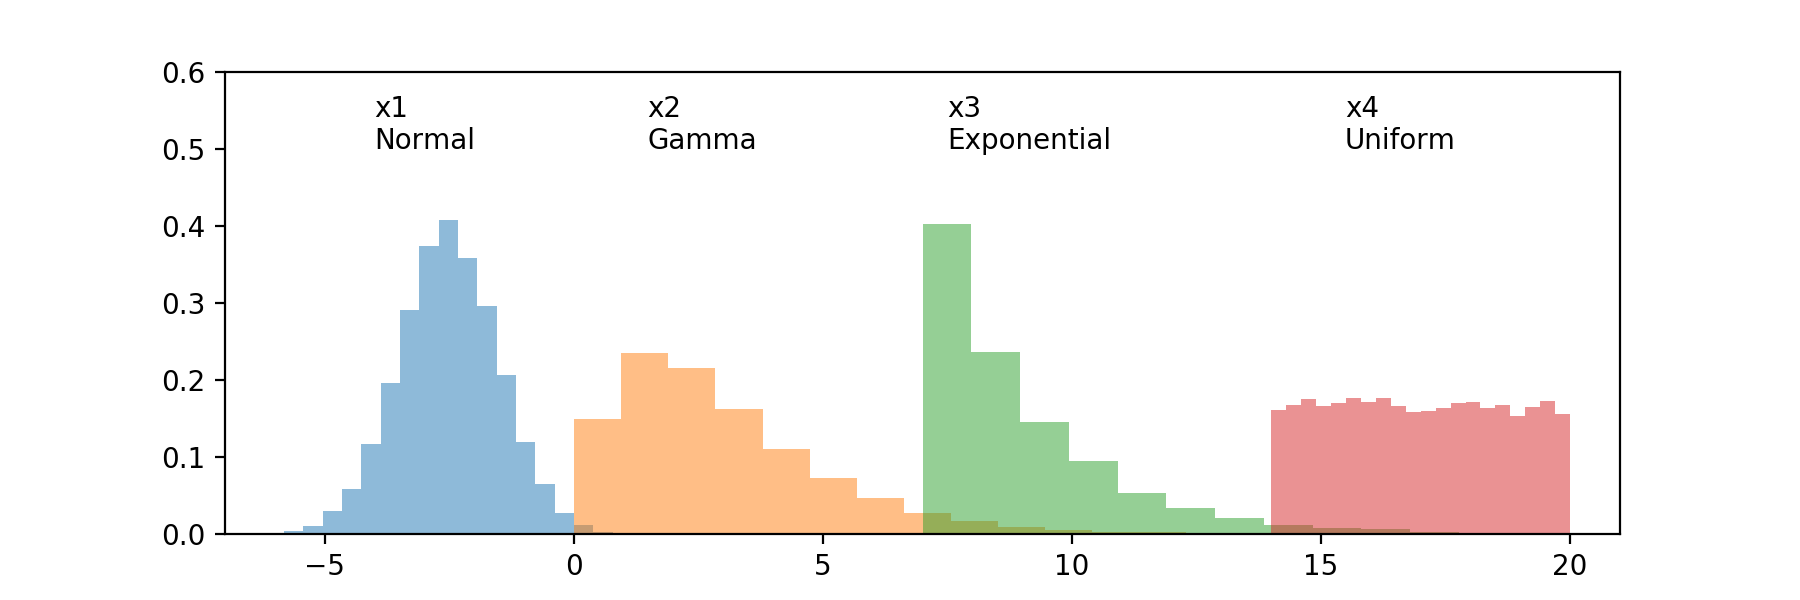

In [1]:
import matplotlib.pyplot as plt
import numpy as np

%matplotlib notebook

# generate 4 random variables from the random, gamma, exponential, and uniform distributions
x1 = np.random.normal(-2.5, 1, 10000)
x2 = np.random.gamma(2, 1.5, 10000)
x3 = np.random.exponential(2, 10000)+7
x4 = np.random.uniform(14,20, 10000)

# plot the histograms
plt.figure(figsize=(9,3))
plt.hist(x1, normed=True, bins=20, alpha=0.5)
plt.hist(x2, normed=True, bins=20, alpha=0.5)
plt.hist(x3, normed=True, bins=20, alpha=0.5)
plt.hist(x4, normed=True, bins=20, alpha=0.5);
plt.axis([-7,21,0,0.6])

plt.text(x1.mean()-1.5, 0.5, 'x1\nNormal')
plt.text(x2.mean()-1.5, 0.5, 'x2\nGamma')
plt.text(x3.mean()-1.5, 0.5, 'x3\nExponential')
plt.text(x4.mean()-1.5, 0.5, 'x4\nUniform')

<IPython.core.display.Javascript object>


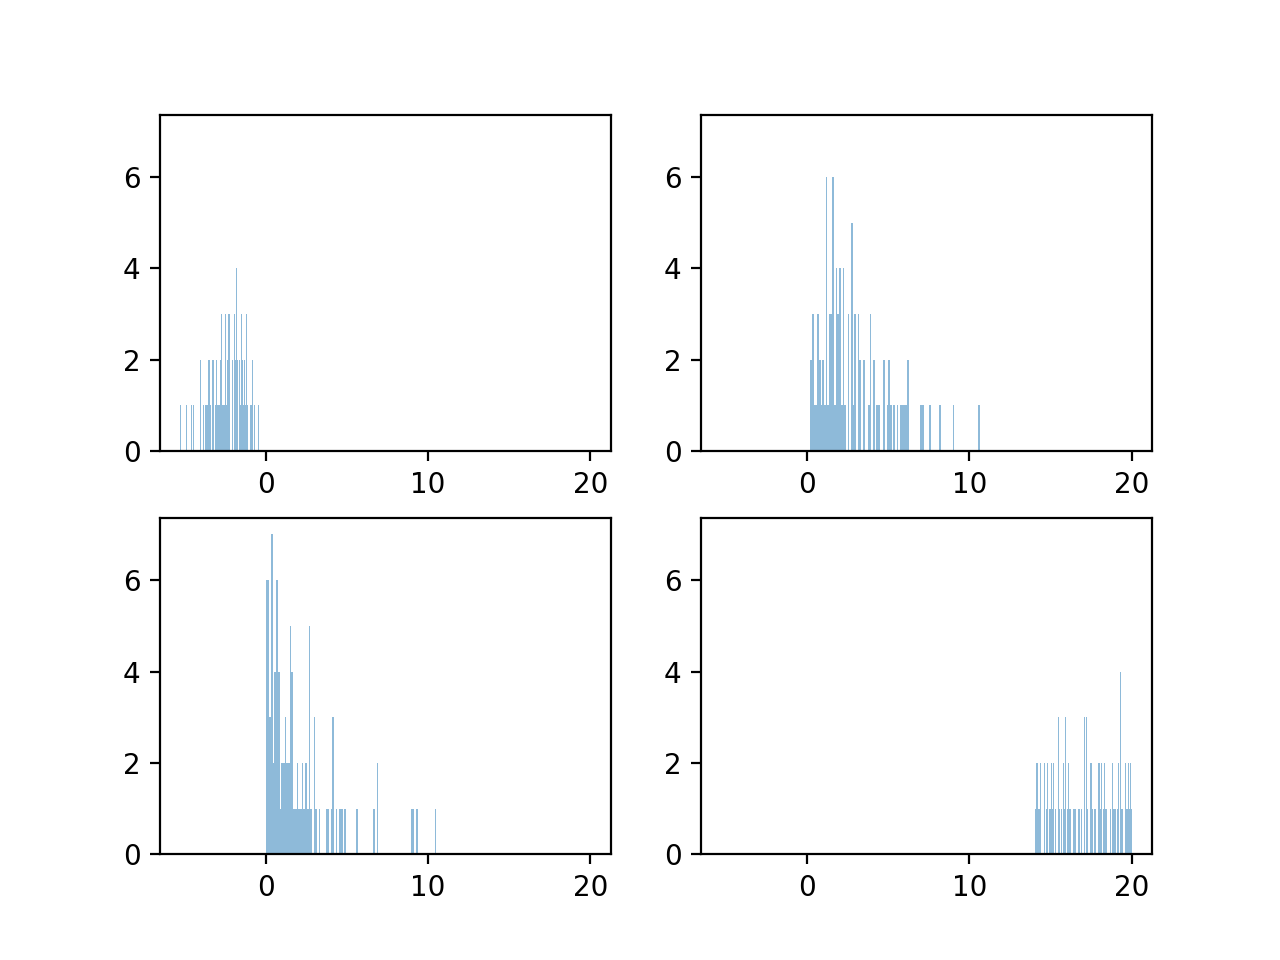

In [31]:
import matplotlib.pyplot as plt
import numpy as np

%matplotlib notebook

# generate 4 random variables from the random, gamma, exponential, and uniform distributions
x1 = np.random.normal(-2.5, 1, 100)
x2 = np.random.gamma(2, 1.5, 100)
x3 = np.random.exponential(2, 100)
x4 = np.random.uniform(14,20, 100)


fig, ((ax1,ax2), (ax3,ax4)) = plt.subplots(2, 2, sharex=True, sharey=True)
ax1.hist(x1, bins=100, alpha=0.5)
ax2.hist(x2, bins=100, alpha=0.5)
ax3.hist(x3, bins=100, alpha=0.5)
ax4.hist(x4, bins=100, alpha=0.5)


for ax in plt.gcf().get_axes():
    for label in ax.get_xticklabels() + ax.get_yticklabels():
        label.set_visible(True)

<IPython.core.display.Javascript object>


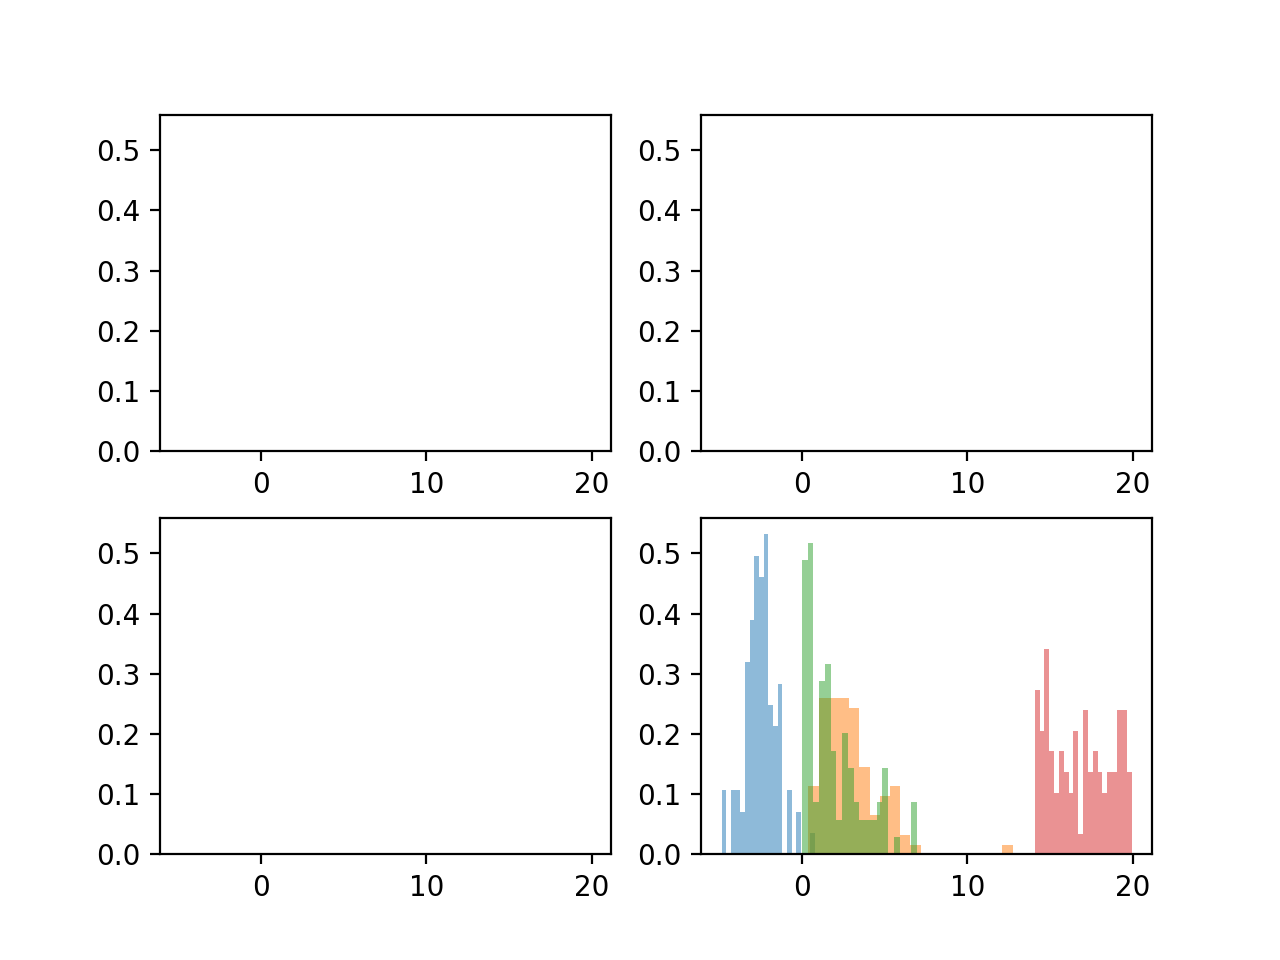

In [28]:
import matplotlib.pyplot as plt
import numpy as np

%matplotlib notebook

# generate 4 random variables from the random, gamma, exponential, and uniform distributions
x1 = np.random.normal(-2.5, 1, 100)
x2 = np.random.gamma(2, 1.5, 100)
x3 = np.random.exponential(2, 100)
x4 = np.random.uniform(14,20, 100)


fig, ((ax1,ax2), (ax3,ax4)) = plt.subplots(2, 2, sharex=True, sharey=True)
ax1 = plt.hist(x1, normed=True, bins=20, alpha=0.5)
ax2 = plt.hist(x2, bins=20, alpha=0.5)
ax3 = plt.hist(x3, bins=20, alpha=0.5)
ax4 = plt.hist(x4, bins=20, alpha=0.5)


for ax in plt.gcf().get_axes():
    for label in ax.get_xticklabels() + ax.get_yticklabels():
        label.set_visible(True)

<IPython.core.display.Javascript object>


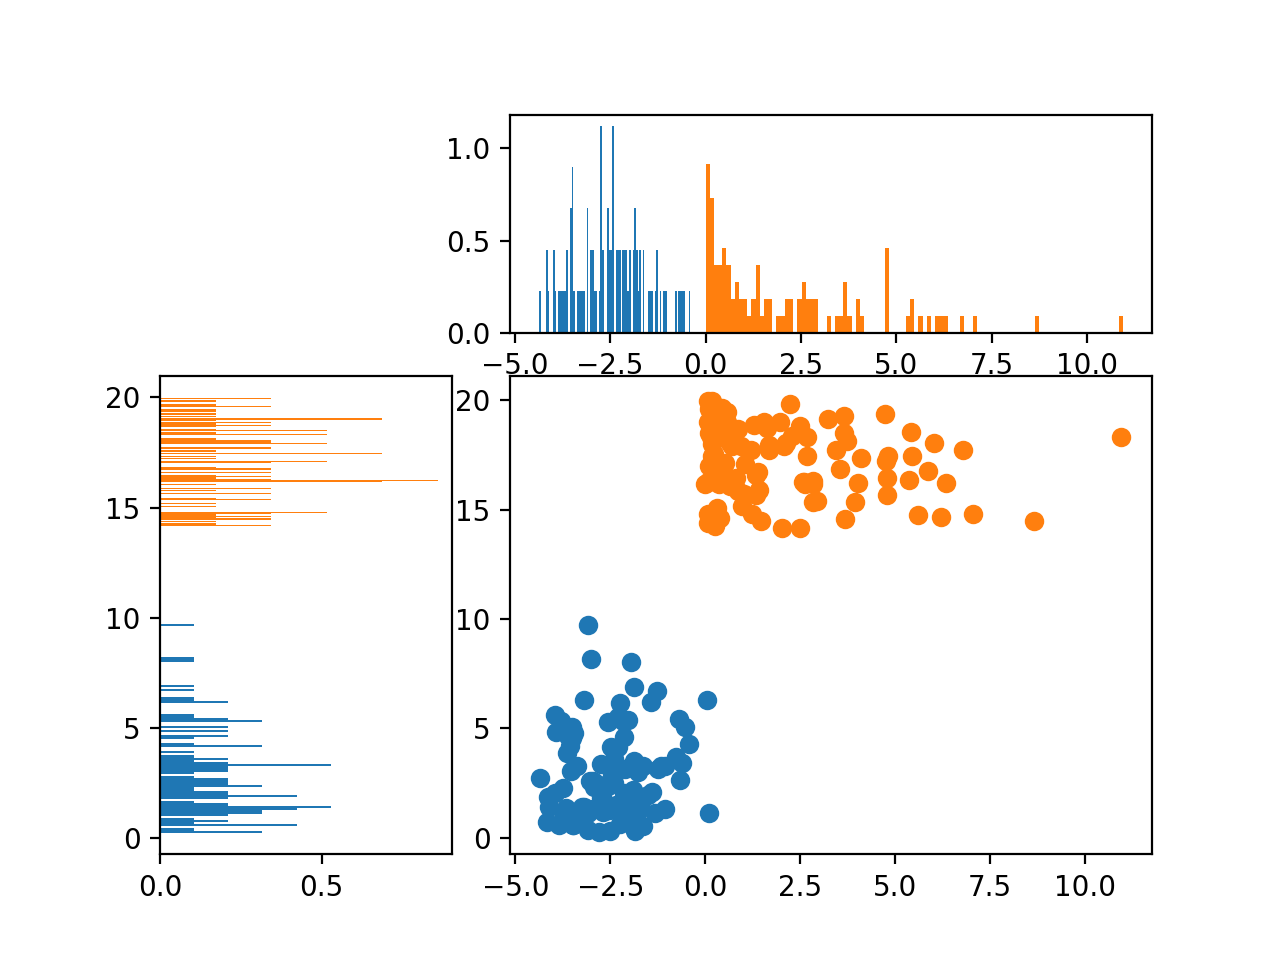

In [15]:
import matplotlib.gridspec as gridspec

plt.figure()
gspec = gridspec.GridSpec(3, 3)

top_histogram = plt.subplot(gspec[0, 1:])
side_histogram = plt.subplot(gspec[1:, 0])
lower_right = plt.subplot(gspec[1:, 1:])

lower_right.scatter(x1, x2)
top_histogram.hist(x1, bins=100, normed= True)
s = side_histogram.hist(x2, bins=100, orientation='horizontal', normed= True)
side_histogram.invert_xaxis()

lower_right.scatter(x3, x4)
top_histogram.hist(x3, bins=100, normed= True)
s = side_histogram.hist(x4, bins=100, orientation='horizontal', normed= True)
side_histogram.invert_xaxis()

<IPython.core.display.Javascript object>


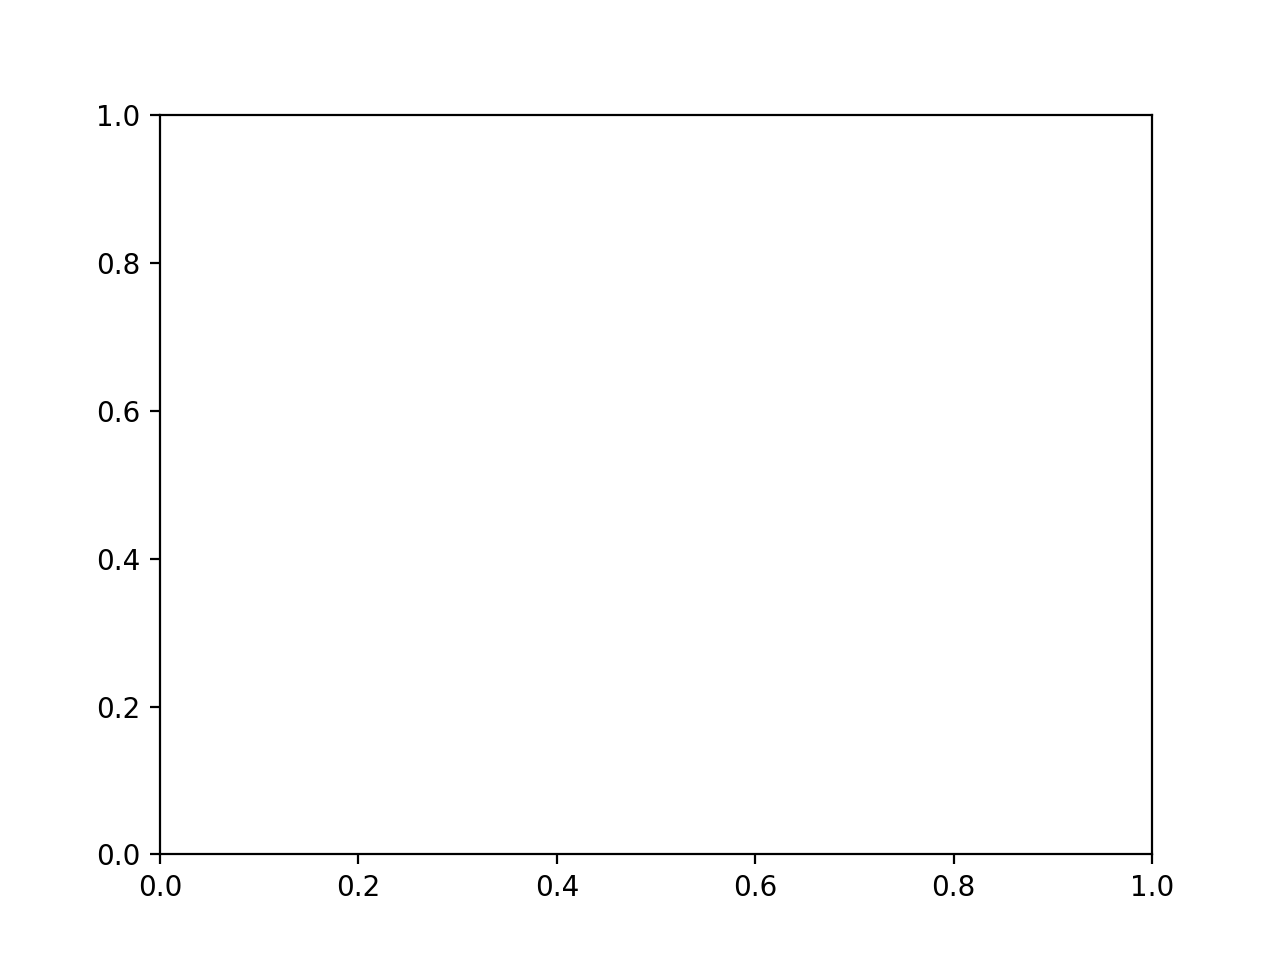

In [32]:
import matplotlib.animation as animation

n= 100
x1 = np.random.normal(-2.5, 1, n)
x2 = np.random.gamma(2, 1.5, n)
x3 = np.random.exponential(2, n)+7
x4 = np.random.uniform(14,20, n)

# create the function that will do the plotting, where curr is the current frame
def update(curr):
    # check if animation is at the last frame, and if so, stop the animation a
    if curr == n: 
        a.event_source.stop()
    plt.cla()
    bins = np.arange(-4, 4, 0.5)
    
    fig, ((ax1,ax2), (ax3,ax4)) = plt.subplots(2, 2, sharex=True, sharey=True)
    ax1.hist(x1[:curr], bins=bins, alpha=0.5)
    ax2.hist(x2[:curr], bins=bins, alpha=0.5)
    ax3.hist(x3[:curr], bins=bins, alpha=0.5)
    ax4.hist(x4[:curr], bins=bins, alpha=0.5)

    plt.axis([-4,4,0,30])
    plt.gca().set_title('Sampling Various Distributions')
    plt.gca().set_ylabel('Frequency')
    plt.gca().set_xlabel('Value')
    plt.annotate('n = {}'.format(curr), [3,27])
    
fig = plt.figure()
a = animation.FuncAnimation(fig, update, interval=100)

<IPython.core.display.Javascript object>


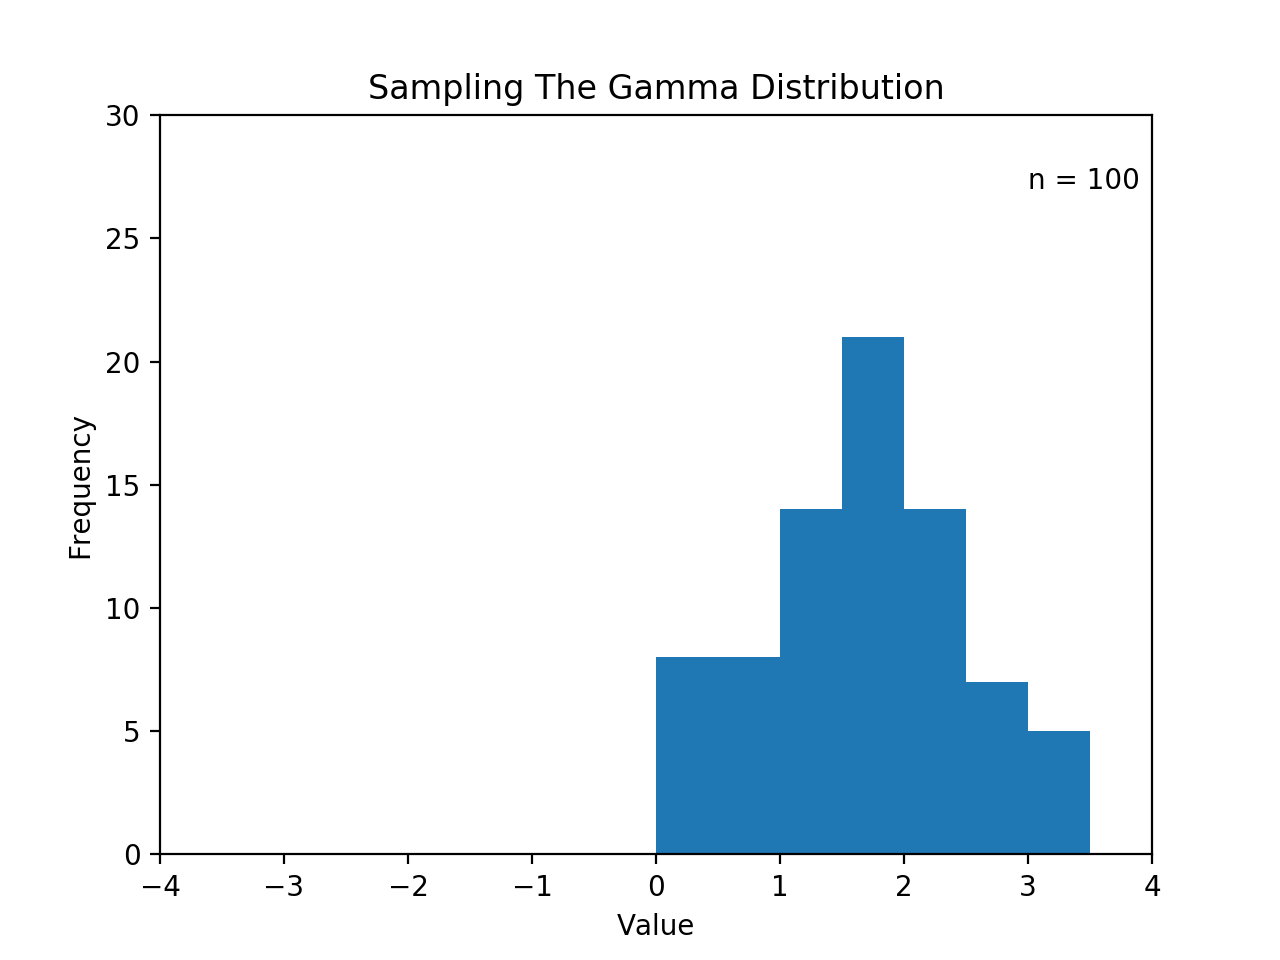

In [25]:
import matplotlib.animation as animation

n= 100
x1 = np.random.normal(-2.5, 1, n)
x2 = np.random.gamma(2, 1.5, n)
x3 = np.random.exponential(2, n)+7
x4 = np.random.uniform(14,20, n)

# create the function that will do the plotting, where curr is the current frame
def update(curr):
    # check if animation is at the last frame, and if so, stop the animation a
    if curr == n: 
        a.event_source.stop()
    plt.cla()
    bins = np.arange(-4, 4, 0.5)
    plt.hist(x2[:curr], bins=bins)
    plt.axis([-4,4,0,30])
    plt.gca().set_title('Sampling The Gamma Distribution')
    plt.gca().set_ylabel('Frequency')
    plt.gca().set_xlabel('Value')
    plt.annotate('n = {}'.format(curr), [3,27])
    
fig = plt.figure()
a = animation.FuncAnimation(fig, update, interval=100)

<IPython.core.display.Javascript object>


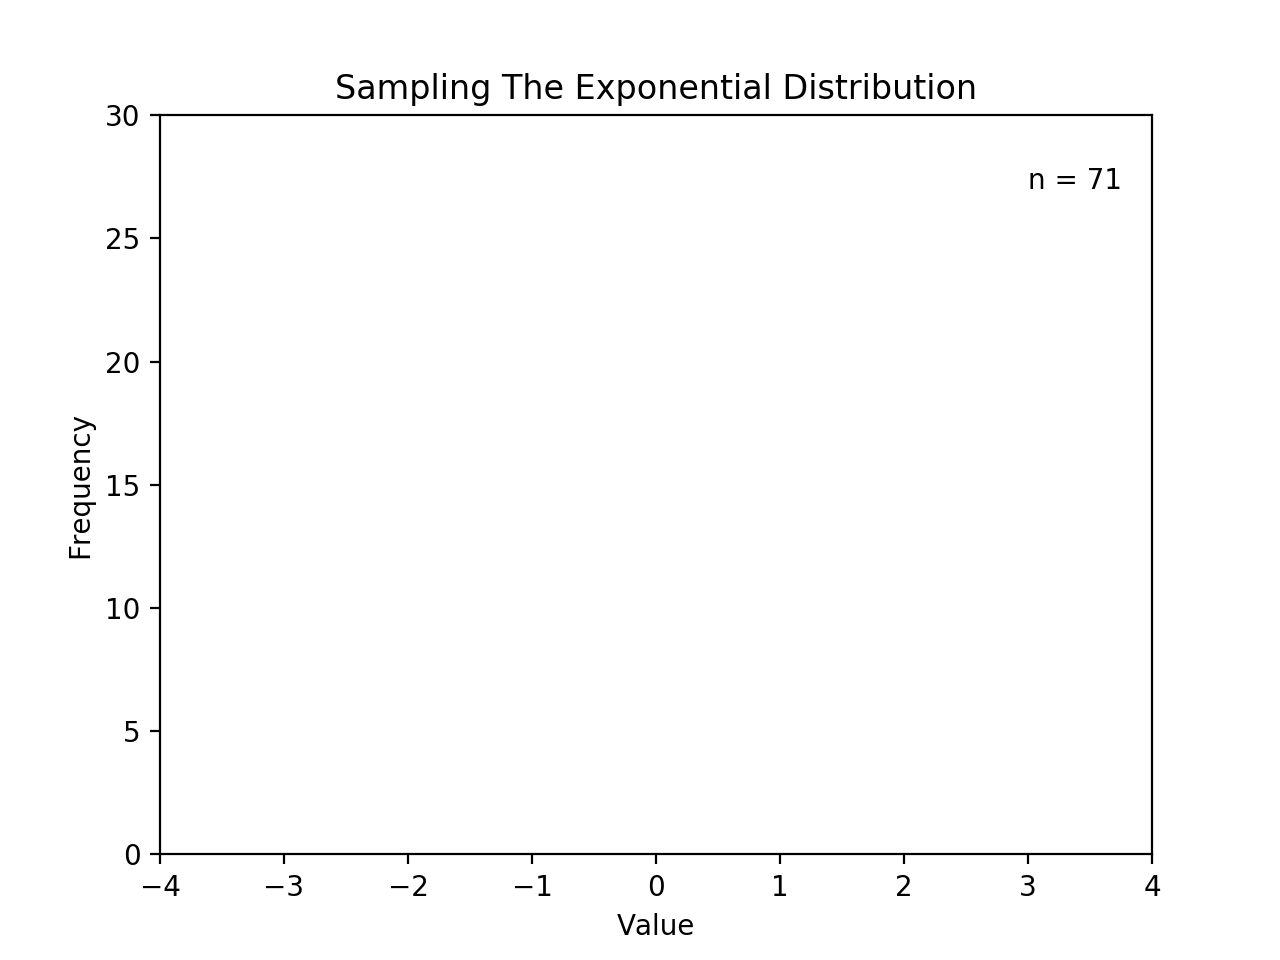

In [26]:
import matplotlib.animation as animation

n= 100
x1 = np.random.normal(-2.5, 1, n)
x2 = np.random.gamma(2, 1.5, n)
x3 = np.random.exponential(2, n)+7
x4 = np.random.uniform(14,20, n)

# create the function that will do the plotting, where curr is the current frame
def update(curr):
    # check if animation is at the last frame, and if so, stop the animation a
    if curr == n: 
        a.event_source.stop()
    plt.cla()
    bins = np.arange(-4, 4, 0.5)
    plt.hist(x3[:curr], bins=bins)
    plt.axis([-4,4,0,30])
    plt.gca().set_title('Sampling The Exponential Distribution')
    plt.gca().set_ylabel('Frequency')
    plt.gca().set_xlabel('Value')
    plt.annotate('n = {}'.format(curr), [3,27])
    
fig = plt.figure()
a = animation.FuncAnimation(fig, update, interval=100)

<IPython.core.display.Javascript object>


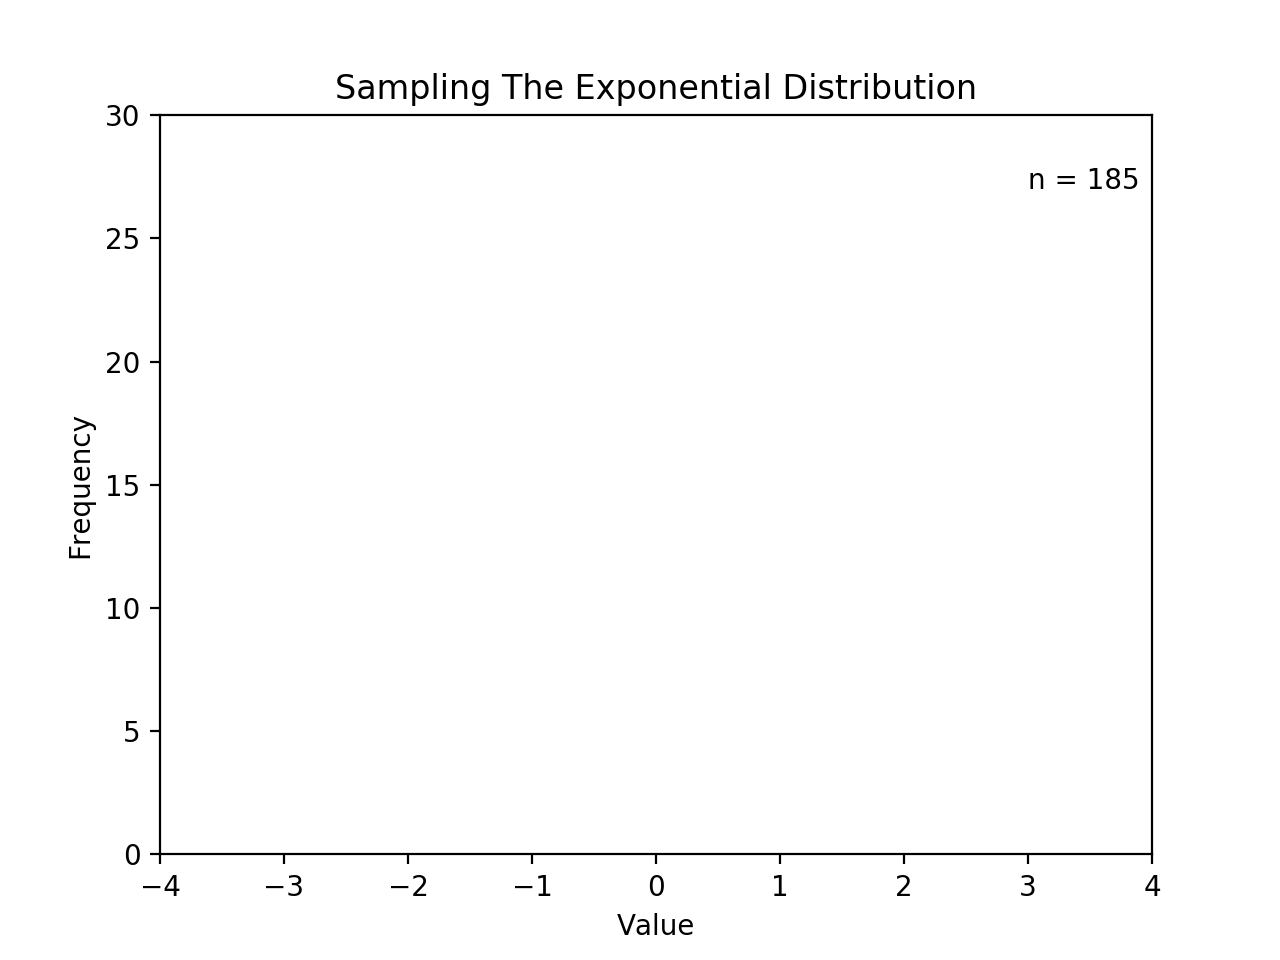

In [27]:
import matplotlib.animation as animation

n= 100
x1 = np.random.normal(-2.5, 1, n)
x2 = np.random.gamma(2, 1.5, n)
x3 = np.random.exponential(2, n)+7
x4 = np.random.uniform(14,20, n)

# create the function that will do the plotting, where curr is the current frame
def update(curr):
    # check if animation is at the last frame, and if so, stop the animation a
    if curr == n: 
        a.event_source.stop()
    plt.cla()
    bins = np.arange(-4, 4, 0.5)
    plt.hist(x4[:curr], bins=bins)
    plt.axis([-4,4,0,30])
    plt.gca().set_title('Sampling The Uniform Distribution')
    plt.gca().set_ylabel('Frequency')
    plt.gca().set_xlabel('Value')
    plt.annotate('n = {}'.format(curr), [3,27])
    
fig = plt.figure()
a = animation.FuncAnimation(fig, update, interval=100)